In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Transformation : x → x'
- 강체 변환 : 크기, 각도 보존 ( ex : Translation, Rotation ) 
- 유사 변환 : 각도 보존, 크기 변환 ( ex : Scaling )
- 선형 변환 : 벡터 공간 이동
- Affine : 선형, 이동 변환 포함. 선의 수평 유지
- Perspective : Affine + 수평선 유지 x. 원근 변환


## Scaling
### cv2.resize( src, size, fx, fy, interpolation )
- size : tuple. (x,y)
- fx,fy : 가로, 세로 배수
- interpolation : 보간 방법

In [10]:
img = cv2.imread('./src/image.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
h,w,_ = img.shape
print(h,w)


1282 1920


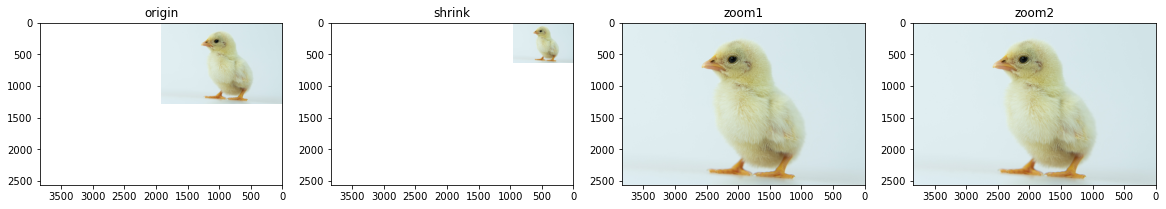

In [18]:
shrink = cv2.resize(img, None, fx = 0.5, fy = 0.5, interpolation = cv2.INTER_AREA)
zoom1 = cv2.resize(img, (2*w,2*h), interpolation = cv2.INTER_CUBIC)
zoom2 = cv2.resize(img, None, fx = 2, fy = 2, interpolation = cv2.INTER_CUBIC)

plt.figure(figsize =(20,12))
plt.subplot(141);plt.imshow(img);plt.ylim([1282*2,0]);plt.xlim([1920*2,0]);plt.title('origin')
plt.subplot(142);plt.imshow(shrink);plt.ylim([1282*2,0]);plt.xlim([1920*2,0]);plt.title('shrink')
plt.subplot(143);plt.imshow(zoom1);plt.ylim([1282*2,0]);plt.xlim([1920*2,0]);plt.title('zoom1')
plt.subplot(144);plt.imshow(zoom2);plt.ylim([1282*2,0]);plt.xlim([1920*2,0]);plt.title('zoom2')
plt.show()

In [21]:
"""cv2.imshow("origin",img)
cv2.imshow("shrink",shrink)
cv2.imshow("zoom1",zoom1)
cv2.imshow("zoom2",zoom2)
cv2.waitKey(0)
cv2.destroyAllWindows()"""

'cv2.imshow("origin",img)\ncv2.imshow("shrink",shrink)\ncv2.imshow("zoom1",zoom1)\ncv2.imshow("zoom2",zoom2)\ncv2.waitKey(0)\ncv2.destroyAllWindows()'

## Translation
### cv2.warpAffine(src, M, size)
- M : 변환 매트릭스
- size = output size(tuple)

In [27]:
img = cv2.imread('src/image.jpg')
img = cv2.resize(img, (640,480), interpolation = cv2.INTER_AREA)
h,w,_ = img.shape

# x,y 50씩 이동
M = np.float32([[1,0,50],
              [0,1,50]])
dst = cv2.warpAffine(img, M,(w,h))

cv2.imshow("origin",img)
cv2.imshow("translation",dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Ratation
### cv2.getRotationMatrix2D(center, angle, scale)
- center : 중심좌표
- angle : 회전 각
- scale : scale factor
- return matrix

In [29]:
img = cv2.imread('src/image.jpg')
img = cv2.resize(img, (640,480), interpolation = cv2.INTER_AREA)
h,w,_ = img.shape

M = cv2.getRotationMatrix2D((w/2,h/2), 90, 0.5)
dst = cv2.warpAffine(img, M,(w,h))

cv2.imshow("origin",img)
cv2.imshow("rotation",dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Affine Transform
### cv2.getAffineTrasform(point1, point2)
- 이동시킬 3점을 지정
- 이동, 확대, scale, 반전
- 평행선 유지

In [30]:
img = cv2.imread('src/image.jpg')
img = cv2.resize(img, (640,480), interpolation = cv2.INTER_AREA)
h,w,_ = img.shape

pts1 = np.float32([[100,100],[200,200],[300,300]])
pts2 = np.float32([[0,0],[300,300],[200,400]])

# pts1의 좌표에 표시. Affine 변환 후 이동 점 확인.
cv2.circle(img, (200,100), 10, (255,0,0),-1)
cv2.circle(img, (400,100), 10, (0,255,0),-1)
cv2.circle(img, (200,200), 10, (0,0,255),-1)

M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M,(w,h))

cv2.imshow("origin",img)
cv2.imshow("rotation",dst)
cv2.waitKey(0)
cv2.destroyAllWindows()